In [1]:
import dataset
import trainner
import model
import lossfunction

ModuleNotFoundError: No module named 'prediction'

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [3]:

spread_times = 3
embedded_depth = 2  # at least 1
vector_size = 8
embedding_size = 64
batch_size = 64

In [4]:
train_dataset = "data/training"
test_dataset = "data/test"
output_path = "output/parameter.model"

In [5]:
data = dataset.GraphDataset(train_dataset)

In [6]:
print("Creating Dataset")
train_dataset = dataset.GraphDataset(train_dataset)
test_dataset = dataset.GraphDataset(test_dataset) if test_dataset is not None else None

Creating Dataset


In [7]:
print("Creating Dataloader")
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, collate_fn=dataset.custom_collate_fn, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=10, collate_fn=dataset.custom_collate_fn, shuffle=True) \
    if test_dataset is not None else None

Creating Dataloader


In [8]:
print("Building model")
try:
    model = model.GraphEmbeddingNetwork(spread_times, embedded_depth, vector_size, embedding_size)
    print("Model built successfully")
except Exception as e:
    print("Error occurred while building the model:", str(e))


Building model
Model built successfully


In [9]:
print("Creating Trainer")
train_model = trainner.Trainer(model, train_data_loader, test_data_loader, lossFunction=lossfunction.MarginLoss())

Creating Trainer
CUDA available: True
Total Parameters: 13056


In [10]:
loss_figure = []
print("Training Start")
epochs = 30
for epoch in range(epochs):
    epoch_loss= train_model.train(epoch, batch_size)
    print(type(epoch_loss))
    loss_figure.append(sum(epoch_loss) / len(epoch_loss))
    train_model.save(epoch, output_path)

Training Start


EP_train:0: 100%|| 3/3 [00:00<00:00, 13.28it/s, epoch=0, iter=2, loss:=0.00476] 


<class 'list'>
EP:0 Model Saved on: output/parameter.model.ep0


EP_train:1: 100%|| 3/3 [00:00<00:00, 14.68it/s, epoch=1, iter=2, loss:=0.00416]


<class 'list'>
EP:1 Model Saved on: output/parameter.model.ep1


EP_train:2: 100%|| 3/3 [00:00<00:00, 24.69it/s, epoch=2, iter=2, loss:=0.000592]


<class 'list'>
EP:2 Model Saved on: output/parameter.model.ep2


EP_train:3: 100%|| 3/3 [00:00<00:00, 22.92it/s, epoch=3, iter=2, loss:=0.000592]


<class 'list'>
EP:3 Model Saved on: output/parameter.model.ep3


EP_train:4: 100%|| 3/3 [00:00<00:00, 22.14it/s, epoch=4, iter=2, loss:=518]     


<class 'list'>
EP:4 Model Saved on: output/parameter.model.ep4


EP_train:5: 100%|| 3/3 [00:00<00:00, 22.30it/s, epoch=5, iter=2, loss:=0.00059] 


<class 'list'>
EP:5 Model Saved on: output/parameter.model.ep5


EP_train:6: 100%|| 3/3 [00:00<00:00, 21.75it/s, epoch=6, iter=2, loss:=0.000589]


<class 'list'>
EP:6 Model Saved on: output/parameter.model.ep6


EP_train:7: 100%|| 3/3 [00:00<00:00, 21.97it/s, epoch=7, iter=2, loss:=1.04e-9]


<class 'list'>
EP:7 Model Saved on: output/parameter.model.ep7


EP_train:8: 100%|| 3/3 [00:00<00:00, 25.55it/s, epoch=8, iter=2, loss:=0.000587]


<class 'list'>
EP:8 Model Saved on: output/parameter.model.ep8


EP_train:9: 100%|| 3/3 [00:00<00:00, 21.33it/s, epoch=9, iter=2, loss:=0.00409] 


<class 'list'>
EP:9 Model Saved on: output/parameter.model.ep9


EP_train:10: 100%|| 3/3 [00:00<00:00, 26.22it/s, epoch=10, iter=2, loss:=9.09e-10]


<class 'list'>
EP:10 Model Saved on: output/parameter.model.ep10


EP_train:11: 100%|| 3/3 [00:00<00:00, 24.33it/s, epoch=11, iter=2, loss:=0.00466] 


<class 'list'>
EP:11 Model Saved on: output/parameter.model.ep11


EP_train:12: 100%|| 3/3 [00:00<00:00, 22.02it/s, epoch=12, iter=2, loss:=8.68e-10]


<class 'list'>
EP:12 Model Saved on: output/parameter.model.ep12


EP_train:13: 100%|| 3/3 [00:00<00:00, 23.59it/s, epoch=13, iter=2, loss:=1.17e-9] 


<class 'list'>
EP:13 Model Saved on: output/parameter.model.ep13


EP_train:14: 100%|| 3/3 [00:00<00:00, 26.81it/s, epoch=14, iter=2, loss:=3.23e+4]


<class 'list'>
EP:14 Model Saved on: output/parameter.model.ep14


EP_train:15: 100%|| 3/3 [00:00<00:00, 23.17it/s, epoch=15, iter=2, loss:=0.00058]


<class 'list'>
EP:15 Model Saved on: output/parameter.model.ep15


EP_train:16: 100%|| 3/3 [00:00<00:00, 25.18it/s, epoch=16, iter=2, loss:=5.16e-10]


<class 'list'>
EP:16 Model Saved on: output/parameter.model.ep16


EP_train:17: 100%|| 3/3 [00:00<00:00, 25.48it/s, epoch=17, iter=2, loss:=0.00461]


<class 'list'>
EP:17 Model Saved on: output/parameter.model.ep17


EP_train:18: 100%|| 3/3 [00:00<00:00, 27.98it/s, epoch=18, iter=2, loss:=0.00402] 


<class 'list'>
EP:18 Model Saved on: output/parameter.model.ep18


EP_train:19: 100%|| 3/3 [00:00<00:00, 25.65it/s, epoch=19, iter=2, loss:=5.16e-10]


<class 'list'>
EP:19 Model Saved on: output/parameter.model.ep19


EP_train:20: 100%|| 3/3 [00:00<00:00, 20.96it/s, epoch=20, iter=2, loss:=6.13e-10]


<class 'list'>
EP:20 Model Saved on: output/parameter.model.ep20


EP_train:21: 100%|| 3/3 [00:00<00:00, 20.37it/s, epoch=21, iter=2, loss:=5.47e-10]


<class 'list'>
EP:21 Model Saved on: output/parameter.model.ep21


EP_train:22: 100%|| 3/3 [00:00<00:00, 26.59it/s, epoch=22, iter=2, loss:=0.000574]


<class 'list'>
EP:22 Model Saved on: output/parameter.model.ep22


EP_train:23: 100%|| 3/3 [00:00<00:00, 26.40it/s, epoch=23, iter=2, loss:=0.00398] 


<class 'list'>
EP:23 Model Saved on: output/parameter.model.ep23


EP_train:24: 100%|| 3/3 [00:00<00:00, 25.12it/s, epoch=24, iter=2, loss:=0.00397] 


<class 'list'>
EP:24 Model Saved on: output/parameter.model.ep24


EP_train:25: 100%|| 3/3 [00:00<00:00, 26.29it/s, epoch=25, iter=2, loss:=0.000572]


<class 'list'>
EP:25 Model Saved on: output/parameter.model.ep25


EP_train:26: 100%|| 3/3 [00:00<00:00, 25.39it/s, epoch=26, iter=2, loss:=0.000571]


<class 'list'>
EP:26 Model Saved on: output/parameter.model.ep26


EP_train:27: 100%|| 3/3 [00:00<00:00, 21.58it/s, epoch=27, iter=2, loss:=0.00452] 


<class 'list'>
EP:27 Model Saved on: output/parameter.model.ep27


EP_train:28: 100%|| 3/3 [00:00<00:00, 26.67it/s, epoch=28, iter=2, loss:=1.14e+4]


<class 'list'>
EP:28 Model Saved on: output/parameter.model.ep28


EP_train:29: 100%|| 3/3 [00:00<00:00, 24.77it/s, epoch=29, iter=2, loss:=0.00393] 

<class 'list'>
EP:29 Model Saved on: output/parameter.model.ep29


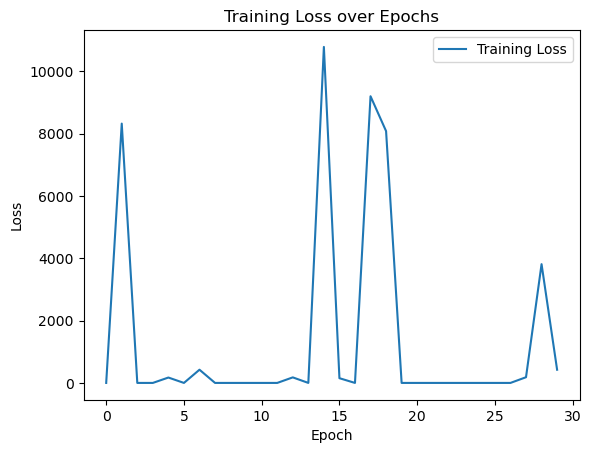

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(epochs), loss_figure, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [10]:
train_model.load("output/parameter.model.ep4")
for epoch in range(1):
    train_model.test(epoch, batch_size)

FileNotFoundError: No model found at output/parameter.model.ep4